***ZADANIE 1***

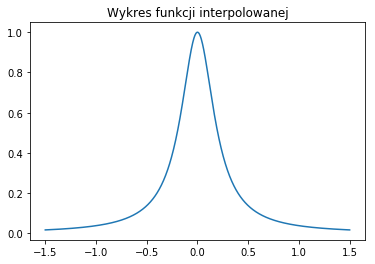

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as inter

def fun(x):
    return 1/(25*(x**2) + 1)


x0 = np.linspace(-1.5, 1.5, 1000)
y0 = fun(x0)
plt.plot(x0, y0)
plt.title('Wykres funkcji interpolowanej')
plt.show()

***ZADANIE 2***

C:\Users\Wojtek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  
C:\Users\Wojtek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  import sys


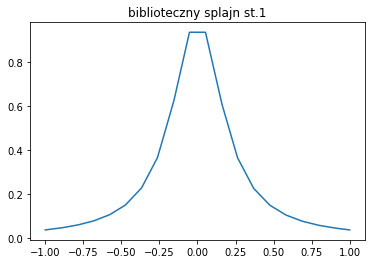

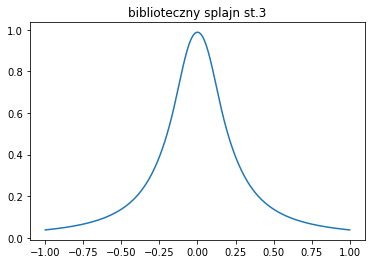

In [14]:
knots = np.linspace(-1, 1, 20)
knots_value = fun(knots)
data = np.linspace(-1, 1, 1000)
data_value = fun(data)

y1 = inter.spline(knots, knots_value, data, order=1)
y11 = inter.spline(knots, knots_value, data, order=3)

plt.plot(data, y1)
plt.title("biblioteczny splajn st.1")
plt.show()

plt.plot(data, y11)
plt.title("biblioteczny splajn st.3")
plt.show()

***ZADANIE 3***

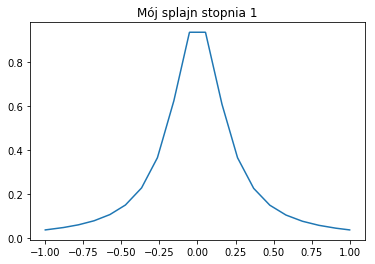

In [8]:
def splajn_1(xk: list, yk: list, xnew: list)->list:
    y = []
    for k in range(len(xk)-1):
        for x in xnew:
            if x >= xk[k] and x<= xk[k+1]:
                y.append(yk[k] + ((yk[k+1]-yk[k])*(x - xk[k]))/(xk[k+1]-xk[k]))
    return y


y2 = splajn_1(knots, knots_value, data)

plt.plot(data, y2)
plt.title("Mój splajn stopnia 1")
plt.show()

***ZADANIE 4***

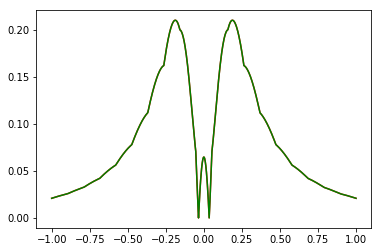

In [11]:
bledy_splajnu_bibliotecznego = abs(y0 - y1)
bledy_splajnu_mojego = abs(y0 - y2)

plt.plot(data, bledy_splajnu_bibliotecznego, color='red')
plt.plot(data, bledy_splajnu_mojego, color='green')
plt.show()

Na przedstawionym wykresie błędy dla splajnu pierwszego stopnia z biblioteki scipy.interpolate
<br>pokrywają się z błędami splajnu pierwszego stopnia zaimplementowanego przezemnie.
<br> Pozwala to wnioskować, że jakość interpolacji jest identyczna.

***ZADANIE 5***

C:\Users\Wojtek\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
C:\Users\Wojtek\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


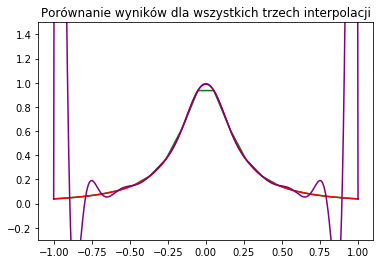

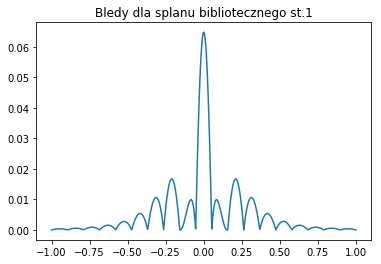

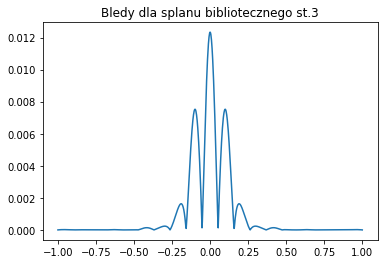

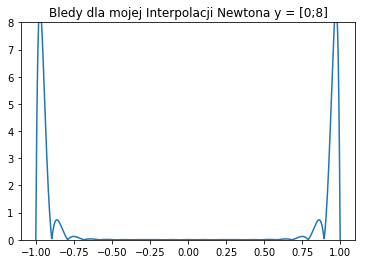

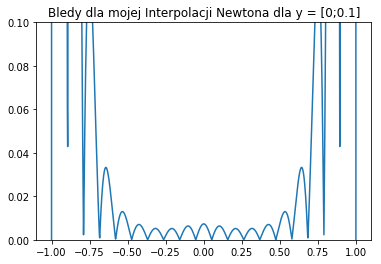

In [16]:
def p(i, data, x):
    n = 1
    for j in np.arange(i):
        n *= (data - x[j])
    return n


def a(i, j, x, y):
    if i == 0:
        return y[0]
    elif i - j == 1:
        return (y[i] - y[j])/(x[i] - x[j])
    else:
        return (a(i, j+1, x, y) - a(i-1, j, x, y))/(x[i]-x[j])


def myNewton(data, x, y):
    Nn = 0
    for i in range(len(x)):
        Nn += a(i, 0, x, y) * p(i, data, x)
    return Nn       

y0 = inter.spline(knots, knots_value, data, order=1)
y1 = inter.spline(knots, knots_value, data, order=3)
y2 = myNewton(data, knots, knots_value)

plt.plot(data, y0, color='green')
plt.plot(data, y1, color='red')
plt.plot(data, y2, color='purple')
plt.title("Porównanie wyników dla wszystkich trzech interpolacji")
plt.ylim(-0.3, 1.5)
plt.show()

bledy_bibl_spline_1 = abs(data_value - y0)
bledy_bibl_spline_3 = abs(data_value - y1)
bledy_myNewton = abs(data_value - y2)

plt.plot(data, bledy_bibl_spline_1)
plt.title("Bledy dla splanu bibliotecznego st.1")
plt.show()

plt.plot(data, bledy_bibl_spline_3)
plt.title("Bledy dla splanu bibliotecznego st.3")
plt.show()

plt.plot(data, bledy_myNewton)
plt.title("Bledy dla mojej Interpolacji Newtona y = [0;8]")
plt.ylim(0, 8)
plt.show()

plt.plot(data, bledy_myNewton)
plt.title("Bledy dla mojej Interpolacji Newtona dla y = [0;0.1]")
plt.ylim(0, 0.1)
plt.show()

Zdecydowanie najdokładniejszą spośród testowanych metod jest splajn st.3, który na końcach badanego przedziału
<br>posiada znacznie mniejsze błedy niż splajn st.1. Metoda Newtona dała olbrzymie błędy na krańcach przedziału
<br>i stosunkowo (do siebie samej) niewielkie błędy na środku przedziału.

***ZADANIE 6***

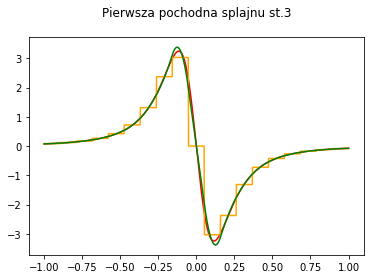

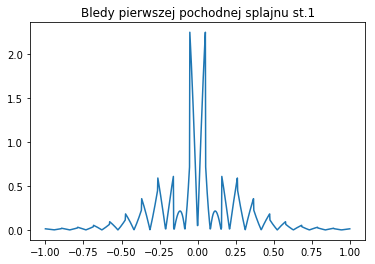

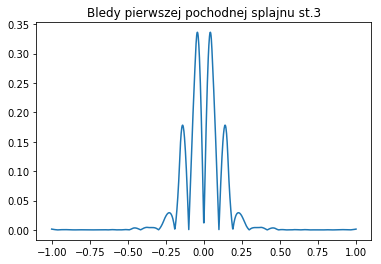

In [20]:
def fun_p(x):
    return -((50*x)/((25*(x**2) + 1)**2))


y1p = inter.InterpolatedUnivariateSpline(knots, knots_value,  k=1).derivative()
y3p = inter.InterpolatedUnivariateSpline(knots, knots_value,  k=3).derivative()

bledy_pochodnej_splajnu_1 = abs(y1p(data) - fun_p(data))
bledy_pochodnej_splajnu_3 = abs(y3p(data) - fun_p(data))

plt.plot(data, fun_p(data), color='red')
plt.title("Pierwsza pochodna badanej funkcji\n")
plt.plot(data, y1p(data), color='orange')
plt.title("Pierwsza pochodna splajnu st.1\n")
plt.plot(data, y3p(data), color='green')
plt.title("Pierwsza pochodna splajnu st.3\n")
plt.show()

plt.plot(data, bledy_pochodnej_splajnu_1)
plt.title("Bledy pierwszej pochodnej splajnu st.1")
plt.show()

plt.plot(data, bledy_pochodnej_splajnu_3)
plt.title("Bledy pierwszej pochodnej splajnu st.3")
plt.show()

Pochodna pierwszego stopnia splajnu st.1 posiada wiele nieciągłości i obarczona jest dużymi błędami
<br>względem funkcji interpolowanej. Pochodna pierwszego stopnia splajnu st.3 posiada natomiast bardzo
<br>niewielkie błędy względem funkcji interpolowanej na środku badanego przedziału i niemal zerowe
<br>zmierzając do jego lewej i prawej krawędzi.